#### IE0005: Introduction to Data Science and Artificial Intelligent - Mini Project

# Topic: Predicting hitlist and playlist based on song features

* Tutorial Group: EL10
* Members:
    1. Gabrielle Nicole Suharjono (U2120811H)
    2. Edmerson Low Soon Xiang (U2120302E)

## 1. Importing

### 1.1 Importing Basic Libraries

In [108]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics
import warnings
warnings.simplefilter(action='ignore')

import plotly.express as px
import plotly.graph_objects as go
from collections import Counter

# Machine Learning

# Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn import metrics

# Logistics Regression
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

# Naive Bayer
from sklearn.naive_bayes import GaussianNB

### 1.2 Importing Dataset

Dataset Downloaded from Kaggle : The Spotify Hit Predictor Dataset (1960-2019)

Source: https://www.kaggle.com/datasets/theoverman/the-spotify-hit-predictor-dataset

Description of the dataset, as available on Kaggle, is as follows.
Learn more : https://www.kaggle.com/datasets/theoverman/the-spotify-hit-predictor-dataset

> **track** : Name of the track  
> **artist** : The Name of the Artist  
> **uri** : The resource identifier for the track  
> **danceability** : how suitable a track is for dancing based on a combination of musical elements  
> **energy** : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity   
> **key** : The estimated overall key of the track. E.g. 0 = C, 1 = C#, 2 = D, and so on. If no key was detected, the value is -1.  
> **loudness** : The overall loudness of a track in decibels (dB)  
> **mode** : Mode indicates the modality (major or minor) of a track. Major is represented by 1 and minor is 0.  
> **speechiness** : Speechiness detects the presence of spoken words in a track  
> **acousticness** : A confidence measure from 0.0 to 1.0 of whether the track is acoustic   
> **instrumentalness** : Predicts whether a track contains no vocals    
> **liveness** : Detects the presence of an audience in the recording   
> **valence** : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track   
> **tempo** : The overall estimated tempo of a track in beats per minute (BPM)   
> **duration_ms** : The duration of the track in milliseconds    
> **time_signature** : An estimated overall time signature of a track    
> **chorus_hit** : This the the author's best estimate of when the chorus would start for the track    
> **sections** : The number of sections the particular track has      
> **target** : The target variable for the track. It can be either '0' or '1'. '1' implies that this song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a 'hit'. '0' Implies that the track is a 'flop' 

In [109]:
df90s = pd.read_csv('data/dataset-of-90s.csv')
df90s.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


In [110]:
df00s = pd.read_csv('data/dataset-of-00s.csv')
df00s.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [111]:
df10s = pd.read_csv('data/dataset-of-10s.csv')
df10s.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


### 1.3 Add New Column for Decade

In [112]:
df90s['decade'] = pd.Series(1990, index=df90s.index)
df00s['decade'] = pd.Series(2000, index=df00s.index)
df10s['decade'] = pd.Series(2010, index=df10s.index)

In [113]:
df90s.head(1)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.031,0.693,0.00699,0.168,0.543,116.211,158840,4,53.89523,6,0,1990


In [114]:
df00s.head(1)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.27,1,0.0289,0.368,0.0,0.159,0.532,133.061,196707,4,30.88059,13,1,2000


In [115]:
df10s.head(1)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02,0.0,0.0828,0.706,108.029,188493,4,41.18681,10,1,2010


### 1.4 Concatenate Data for All Decade

In [116]:
df = pd.concat([df90s,df00s,df10s], axis = 0).sample(frac=1.0, random_state=1).reset_index(drop=True)
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Gypsy,Shakira,spotify:track:3FESsHW8mAuiIsYpK6aJ6u,0.763,0.758,6,-5.106,1,0.0576,0.64000,0.00000,0.0706,0.515,92.727,198827,4,31.45224,10,1,2010
1,Sirena,Faun,spotify:track:0SUs7qqfixfBQjKiv4YNNH,0.537,0.631,7,-12.199,1,0.0322,0.00676,0.00849,0.1530,0.158,134.960,311480,5,32.25945,12,0,2000
2,Same Girl,R. Kelly Duet With Usher,spotify:track:6OSmeoh8kXhCfz9WqvzDoJ,0.717,0.583,1,-5.008,1,0.1460,0.50600,0.00000,0.0821,0.816,139.760,252933,4,31.52992,10,1,2000
3,T-shirt van Metallica - Live @ Graspop Metal M...,Fleddy Melculy,spotify:track:1CdYprGrbKNlhgFUX3nHTy,0.264,0.745,1,-5.651,1,0.1470,0.00122,0.03080,0.9270,0.220,173.038,292813,4,57.25540,14,0,2010
4,I Can Make It Better,Luther Vandross,spotify:track:70NmePXQxL3b688VuLSFae,0.714,0.497,0,-7.643,1,0.0344,0.28500,0.00000,0.0668,0.671,95.817,335480,3,25.39514,15,1,1990


## 2. Data Cleaning

### 2.1 Checking for Missing Data

In [117]:
print("Data type : ", type(df))
print("Data dims : ", df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (17790, 20)


In [118]:
#Calculating the Percentage of Missing Values for Each Variable
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

track - 0.0%
artist - 0.0%
uri - 0.0%
danceability - 0.0%
energy - 0.0%
key - 0.0%
loudness - 0.0%
mode - 0.0%
speechiness - 0.0%
acousticness - 0.0%
instrumentalness - 0.0%
liveness - 0.0%
valence - 0.0%
tempo - 0.0%
duration_ms - 0.0%
time_signature - 0.0%
chorus_hit - 0.0%
sections - 0.0%
target - 0.0%
decade - 0.0%


**Comment** - Looking at the percentage values, there are `no missing values` for all variables in the dataset

### 2.2 Converting miliseconds duration into minutes

In [119]:
df['duration_min'] = df['duration_ms']/60000
df['duration_min'] = df['duration_min'].round(2)
df['duration_min'].head()

0    3.31
1    5.19
2    4.22
3    4.88
4    5.59
Name: duration_min, dtype: float64

In [120]:
# Drop duration in miliseconds
df = df.drop(['duration_ms'], axis = 1)

### 2.3 Checking for duplicated data

In [121]:
df.duplicated().sum()

0

**Comment** - There are not any `duplicates data` in the dataframe but this may be caused by the unique `uri` feature

In [122]:
df = df.drop(labels=['uri'], axis=1)
df.shape

(17790, 19)

In [123]:
df.duplicated().sum()

138

**Comment** - After removing `uri` feature, it is found that there are 138 duplicates in the dataset, which need to be removed. Below is the (a portion of) list of duplicated data:

In [124]:
df[df.duplicated()].head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections,target,decade,duration_min
1145,She's a Carioca (Remastered),Stanley Turrentine,0.507,0.328,4,-12.770,0,0.0306,0.911000,0.858,0.1050,0.208,114.769,4,16.66228,21,0,2010,6.52
1320,From the Flames,Memoriam,0.525,0.602,6,-15.015,1,0.0466,0.002470,0.572,0.1040,0.146,80.057,4,46.31089,12,0,2010,5.66
1526,Black Hole Metal,Black Crucifixion,0.349,0.959,10,-3.854,1,0.0570,0.000024,0.750,0.3580,0.257,94.977,4,65.36389,8,0,2010,3.08
2138,Feeling Punk - Asle Remix,Todd Terry,0.739,0.772,4,-10.172,1,0.0900,0.001260,0.708,0.0751,0.699,122.997,4,97.57510,8,0,2010,5.76
2270,All Pride No Pain,Upon A Burning Body,0.594,0.933,4,-6.072,0,0.1980,0.000170,0.359,0.2640,0.159,108.041,4,25.19260,8,0,2010,3.46


In [125]:
df = df.drop_duplicates()
df.shape

(17652, 19)

**Comment** - Thus, we dropped the 138 duplicated columns

In [126]:
df.duplicated().sum()

0

### 2.4 Changing 0 and 1 to Boolean Values

From the data description in Kaggle, we understand that the features below is a boolean data type:
> **mode** : Mode indicates the modality (major or minor) of a track. '0' for minor and '1' for major   
> **target** : The target variable for the track. It can be either '0' or '1'. '1' implies that this song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a 'hit'. '0' Implies that the track is a 'flop' 

Therefore, we need to change the 0 and 1 to False and True to avoid confusion

In [127]:
df["target"].replace(0, False, inplace=True)
df["target"].replace(1, True, inplace=True)
df["target"].head()

0     True
1    False
2     True
3    False
4     True
Name: target, dtype: bool

In [128]:
df["mode"].replace(0, False, inplace=True)
df["mode"].replace(1, True, inplace=True)
df["mode"].head()

0    True
1    True
2    True
3    True
4    True
Name: mode, dtype: bool

### 2.5 Change Column Name

The current dataset has the `target` features which indicate if the songs is `hit` or `flop` (popular or not). It will be easier to understand if we change the column name from target to `hitlist`. We also change the column name `mode` to `major`.

In [129]:
df.rename(columns={'target': 'hitlist'}, inplace=True)
df.rename(columns={'mode': 'major'}, inplace=True)

In [130]:
df.head()

,track,artist,danceability,energy,key,loudness,major,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections,hitlist,decade,duration_min
0,Gypsy,Shakira,0.763,0.758,6,-5.106,True,0.0576,0.64000,0.00000,0.0706,0.515,92.727,4,31.45224,10,True,2010,3.31
1,Sirena,Faun,0.537,0.631,7,-12.199,True,0.0322,0.00676,0.00849,0.1530,0.158,134.960,5,32.25945,12,False,2000,5.19
2,Same Girl,R. Kelly Duet With Usher,0.717,0.583,1,-5.008,True,0.1460,0.50600,0.00000,0.0821,0.816,139.760,4,31.52992,10,True,2000,4.22
3,T-shirt van Metallica - Live @ Graspop Metal M...,Fleddy Melculy,0.264,0.745,1,-5.651,True,0.1470,0.00122,0.03080,0.9270,0.220,173.038,4,57.25540,14,False,2010,4.88
4,I Can Make It Better,Luther Vandross,0.714,0.497,0,-7.643,True,0.0344,0.28500,0.00000,0.0668,0.671,95.817,3,25.39514,15,True,1990,5.59


### 2.6 Change Key Column from numerical to categorical data

In [131]:
df.replace({'key' : { 0 : 'C', 1 : 'C#', 2 : 'D', 3 : 'D#', 4 : 'E', 5 : 'F', 6 : 'F#', 
                        7 : 'G', 8 : 'G#', 9 : 'A', 10 : 'A#', 11 : 'B'}} , inplace=True)

In [132]:
df.head()

,track,artist,danceability,energy,key,loudness,major,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections,hitlist,decade,duration_min
0,Gypsy,Shakira,0.763,0.758,F#,-5.106,True,0.0576,0.64000,0.00000,0.0706,0.515,92.727,4,31.45224,10,True,2010,3.31
1,Sirena,Faun,0.537,0.631,G,-12.199,True,0.0322,0.00676,0.00849,0.1530,0.158,134.960,5,32.25945,12,False,2000,5.19
2,Same Girl,R. Kelly Duet With Usher,0.717,0.583,C#,-5.008,True,0.1460,0.50600,0.00000,0.0821,0.816,139.760,4,31.52992,10,True,2000,4.22
3,T-shirt van Metallica - Live @ Graspop Metal M...,Fleddy Melculy,0.264,0.745,C#,-5.651,True,0.1470,0.00122,0.03080,0.9270,0.220,173.038,4,57.25540,14,False,2010,4.88
4,I Can Make It Better,Luther Vandross,0.714,0.497,C,-7.643,True,0.0344,0.28500,0.00000,0.0668,0.671,95.817,3,25.39514,15,True,1990,5.59


### 2.7 Clean Dataset for Each Decadem

In [133]:
df90s = df[df['decade'] == 1990].reset_index()
df90s.head()

,index,track,artist,danceability,energy,key,loudness,major,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections,hitlist,decade,duration_min
0,4,I Can Make It Better,Luther Vandross,0.714,0.497,C,-7.643,True,0.0344,0.285000,0.000000,0.0668,0.671,95.817,3,25.39514,15,True,1990,5.59
1,14,The New Democracy,The Nashville Bluegrass Band,0.513,0.429,D,-15.271,True,0.0336,0.471000,0.950000,0.2910,0.819,142.354,4,74.51253,7,False,1990,2.94
2,15,(I Want To Be An) Anglepoise Lamp (Live,The Soft Boys,0.409,0.929,A,-7.658,True,0.0685,0.047900,0.000000,0.1560,0.443,89.412,4,81.31047,7,False,1990,2.93
3,17,Lockdown,Madball,0.401,0.968,B,-6.681,True,0.1240,0.000294,0.000451,0.1210,0.278,90.226,4,51.03063,5,False,1990,1.75
4,19,She's A River,Simple Minds,0.370,0.854,D,-7.018,True,0.0812,0.001470,0.000006,0.0586,0.181,184.068,4,29.65163,17,True,1990,5.54


In [134]:
df00s = df[df['decade'] == 2000].reset_index()
df00s.head()

,index,track,artist,danceability,energy,key,loudness,major,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections,hitlist,decade,duration_min
0,1,Sirena,Faun,0.537,0.631,G,-12.199,True,0.0322,0.00676,0.008490,0.1530,0.158,134.960,5,32.25945,12,False,2000,5.19
1,2,Same Girl,R. Kelly Duet With Usher,0.717,0.583,C#,-5.008,True,0.1460,0.50600,0.000000,0.0821,0.816,139.760,4,31.52992,10,True,2000,4.22
2,6,So Sick,Ne-Yo,0.452,0.574,F#,-8.336,True,0.3100,0.24600,0.000000,0.1890,0.580,92.791,4,20.40989,11,True,2000,3.45
3,8,Forget About the Boy,Sutton Foster,0.456,0.437,D,-9.599,False,0.2580,0.72700,0.000002,0.4600,0.766,200.316,4,28.38139,11,False,2000,3.39
4,12,Toes,Zac Brown Band,0.800,0.759,B,-5.398,True,0.0378,0.65500,0.000000,0.0897,0.821,129.979,4,29.42405,10,True,2000,4.38


In [135]:
df10s = df[df['decade'] == 2010].reset_index()
df10s.head()

,index,track,artist,danceability,energy,key,loudness,major,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections,hitlist,decade,duration_min
0,0,Gypsy,Shakira,0.763,0.758,F#,-5.106,True,0.0576,0.64000,0.0000,0.0706,0.515,92.727,4,31.45224,10,True,2010,3.31
1,3,T-shirt van Metallica - Live @ Graspop Metal M...,Fleddy Melculy,0.264,0.745,C#,-5.651,True,0.1470,0.00122,0.0308,0.9270,0.220,173.038,4,57.25540,14,False,2010,4.88
2,5,Questions,Chris Brown,0.614,0.598,A#,-6.335,False,0.0561,0.00543,0.0000,0.1000,0.565,105.803,4,43.76138,6,True,2010,2.16
3,7,Another Round,Fat Joe Featuring Chris Brown,0.271,0.762,F#,-6.277,False,0.2750,0.07190,0.0000,0.1430,0.410,80.248,4,49.06984,12,True,2010,4.81
4,9,Doabey Wala,Garry Sandhu,0.804,0.795,B,-2.951,False,0.1100,0.01600,0.0000,0.2000,0.336,98.041,4,29.42124,9,False,2010,3.63


## 3. Exploratory Analysis

### 3.1 General Information of Datasets

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17652 entries, 0 to 17789
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             17652 non-null  object 
 1   artist            17652 non-null  object 
 2   danceability      17652 non-null  float64
 3   energy            17652 non-null  float64
 4   key               17652 non-null  object 
 5   loudness          17652 non-null  float64
 6   major             17652 non-null  bool   
 7   speechiness       17652 non-null  float64
 8   acousticness      17652 non-null  float64
 9   instrumentalness  17652 non-null  float64
 10  liveness          17652 non-null  float64
 11  valence           17652 non-null  float64
 12  tempo             17652 non-null  float64
 13  time_signature    17652 non-null  int64  
 14  chorus_hit        17652 non-null  float64
 15  sections          17652 non-null  int64  
 16  hitlist           17652 non-null  bool  

#### 'Hit' songs in the Dataset

In [137]:
# Number of artist in the Dataset
print("Number of unique artist :", len(df["artist"].unique()))

# Popular tracks in the Dataset
hit_data = df[df["hitlist"] == True]
print("Number of 'Hit' Tracks :", len(hit_data))

Number of unique artist : 7926
Number of 'Hit' Tracks : 8895


True     8895
False    8757
Name: hitlist, dtype: int64


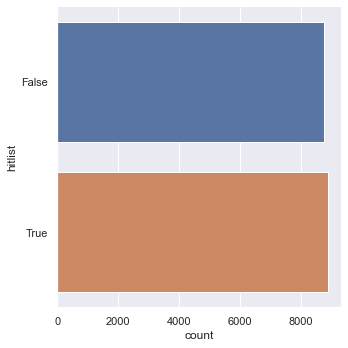

In [138]:
print(df["hitlist"].value_counts())
sb.catplot(y = "hitlist", data = df, kind = "count")

**Comment** - There are only 7926 unique artists from 17652 songs in the dataset. This shows that the dataset contains a few different songs from one artist. From the countplot, it can be seen that there are 8895 'hit' songs and 8757 'flop' songs.

### 3.2 Observation for Top Artists

#### Top 10 Artist with Most Number of Songs

Text(0.5, 0, 'Number of Song')

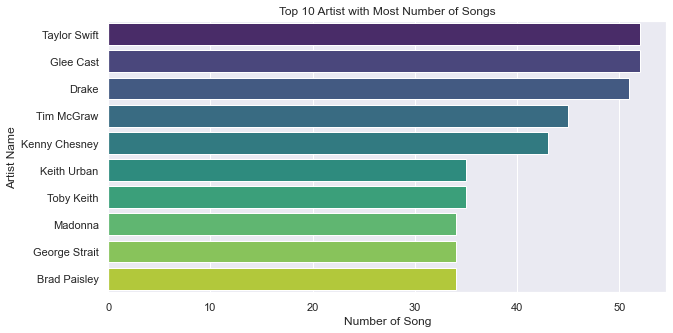

In [139]:
most_songs = df['artist'].value_counts().head(10)
axis = sb.barplot(most_songs, most_songs.index, palette="viridis", orient = 'h')
axis.set_title('Top 10 Artist with Most Number of Songs')
axis.set_ylabel('Artist Name')
axis.set_xlabel('Number of Song')

**Comment** - From the list above, it can be seen that `Taylor Swift` and `Glee Cast` are the artists that produced most number of songs in 1990 - 2010. However, it does not necessarily mean that these artists produce the most hitlist songs.

#### To 10 Artists with Most HITLIST Songs

In [140]:
most_hitlist_songs = df.groupby("artist")['hitlist'].sum().sort_values(ascending=False).head(10)
print("TOP 10 ARTIST WITH MOST HITLIST SONGS:")
most_hitlist_songs

TOP 10 ARTIST WITH MOST HITLIST SONGS:


artist
Glee Cast        52
Taylor Swift     52
Drake            51
Tim McGraw       45
Kenny Chesney    43
Keith Urban      35
Toby Keith       35
Brad Paisley     34
George Strait    34
Madonna          34
Name: hitlist, dtype: int64

Text(0.5, 0, 'Number of Popular Song')

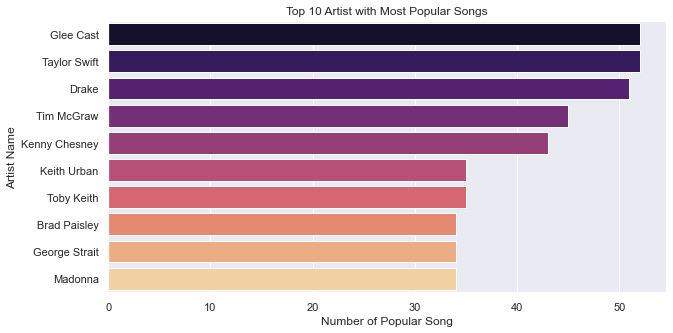

In [141]:
axis = sb.barplot(most_hitlist_songs, most_hitlist_songs.index, palette="magma", orient = 'h')
axis.set_title('Top 10 Artist with Most Popular Songs')
axis.set_ylabel('Artist Name')
axis.set_xlabel('Number of Popular Song')

**Comment** - From the list above, it can be seen that `Taylor Swift` and `Glee Cast` are the artists that produced most songs that is inside the hitlist in 1990 - 2010.

**Comment** - It can be seen that the list for artists with `most number of songs` and artist with `most hitlist songs` are identical. Let's try to see if there is a difference for top 20 list. 

#### Top 20 Artist with Most Number of Songs

In [142]:
top20_most_songs = df['artist'].value_counts().head(20)
freqArtist = pd.DataFrame(top20_most_songs)
freqArtist = freqArtist.reset_index()
freqArtist.rename(columns={'index': 'Artist Name', 'artist': 'Frequency'}, inplace = True)
freqArtist.index += 1
freqArtist

,Artist Name,Frequency
1,Taylor Swift,52
2,Glee Cast,52
3,Drake,51
4,Tim McGraw,45
5,Kenny Chesney,43
6,Keith Urban,35
7,Toby Keith,35
8,Madonna,34
9,George Strait,34
10,Brad Paisley,34


In [143]:
px.bar(data_frame=freqArtist, x='Artist Name', y='Frequency', color = "Frequency", height=400)

#### Top 20 Artists with Most HITLIST Songs

In [144]:
top20_hitlist_songs = df.groupby("artist")['hitlist'].sum().sort_values(ascending=False).head(20)
freqHitlist = pd.DataFrame(top20_hitlist_songs)
freqHitlist = freqHitlist.reset_index()
freqHitlist.rename(columns={'artist': 'Artist Name', 'hitlist': 'Hitlist Frequency'}, inplace = True)
freqHitlist.index += 1
freqHitlist

,Artist Name,Hitlist Frequency
1,Glee Cast,52
2,Taylor Swift,52
3,Drake,51
4,Tim McGraw,45
5,Kenny Chesney,43
6,Keith Urban,35
7,Toby Keith,35
8,Brad Paisley,34
9,George Strait,34
10,Madonna,34


In [145]:
px.bar(data_frame=freqHitlist, x='Artist Name', y='Hitlist Frequency', color = "Hitlist Frequency", height=400)

**Comment** - There is noticeable different in both top 20 lists. For example, `Johan Sebastian Bach` composed 30 songs in total, but not all of his songs was inside the hitlist. While `Alan Jackson` was not in the top 20 artist producing most songs, but all 25 of his songs was inside the hitlist.

### 3.3 Observation for Key Column

#### Most Used Key with Pie Chart

In [147]:
d1_freqKey = dict(Counter(df['key'].values))
freqKey = pd.DataFrame(list(d1_freqKey.items()), columns = ['Key', 'Frequency'])
freqKey

,Key,Frequency
0,F#,1288
1,G,2013
2,C#,1853
3,C,1983
4,A#,1188
5,D,1759
6,B,1406
7,A,1671
8,F,1429
9,G#,1162


In [148]:
px.pie(freqKey, values='Frequency', names='Key')

#### Most Used Key with Bar Chart

G     2013
C     1983
C#    1853
D     1759
A     1671
F     1429
B     1406
E     1337
F#    1288
A#    1188
G#    1162
D#     563
Name: key, dtype: int64


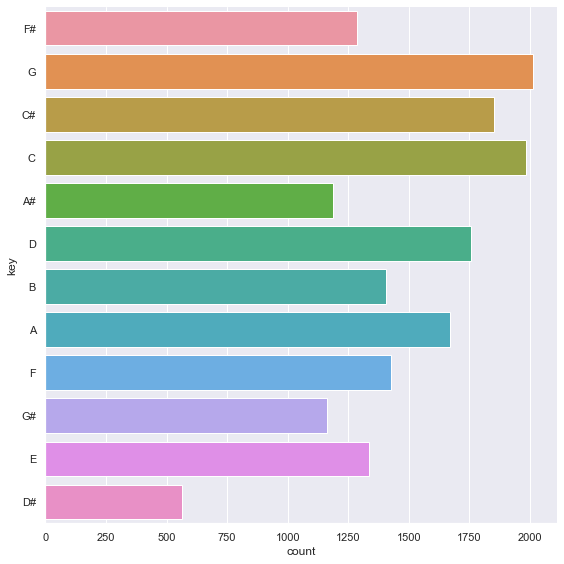

In [146]:
print(df["key"].value_counts())
sb.catplot(y = "key", data = df, kind = "count", height = 8)

### Most Used Key with TreeMap Chart

In [149]:
px.treemap(data_frame=freqKey, path=['Key'], values='Frequency', color='Frequency')

**Comment** - It can be seen that most songs (2013 songs) in 1990 - 2010 used G key, followed by C key (1983 songs) and C# Key (1853 songs)

### 3.4 Numerical Analysis

In [150]:
dfNumeric = df.drop(["track", "artist", "key", "major", "hitlist", "time_signature", "decade"], axis = 1)
dfNumeric.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,chorus_hit,sections,duration_min
0,0.763,0.758,-5.106,0.0576,0.64000,0.00000,0.0706,0.515,92.727,31.45224,10,3.31
1,0.537,0.631,-12.199,0.0322,0.00676,0.00849,0.1530,0.158,134.960,32.25945,12,5.19
2,0.717,0.583,-5.008,0.1460,0.50600,0.00000,0.0821,0.816,139.760,31.52992,10,4.22
3,0.264,0.745,-5.651,0.1470,0.00122,0.03080,0.9270,0.220,173.038,57.25540,14,4.88
4,0.714,0.497,-7.643,0.0344,0.28500,0.00000,0.0668,0.671,95.817,25.39514,15,5.59


In [151]:
dfNumeric.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,chorus_hit,sections,duration_min
count,17652.000000,17652.000000,17652.000000,17652.000000,17652.000000,17652.000000,17652.000000,17652.000000,17652.000000,17652.000000,17652.000000,17652.000000
mean,0.559866,0.656133,-8.357624,0.088782,0.239289,0.157417,0.196809,0.486677,121.021242,40.905438,10.802459,4.159004
std,0.187507,0.245832,5.306380,0.092787,0.307296,0.307654,0.167445,0.255093,29.905685,19.910653,4.731114,1.861358
min,0.057600,0.000251,-49.253000,0.022000,0.000000,0.000000,0.013000,0.000000,34.535000,0.000000,1.000000,0.270000
25%,0.438000,0.505000,-9.903000,0.035700,0.009020,0.000000,0.093800,0.279000,97.114500,27.884680,8.000000,3.330000
50%,0.577000,0.700000,-6.896500,0.050400,0.082200,0.000043,0.128000,0.488000,119.838000,36.253575,10.000000,3.890000
75%,0.697000,0.856000,-5.028750,0.096700,0.377000,0.058100,0.257000,0.691000,140.001000,48.262235,12.000000,4.610000
max,0.986000,0.999000,1.137000,0.956000,0.996000,0.998000,0.992000,0.996000,217.943000,262.615400,169.000000,69.500000


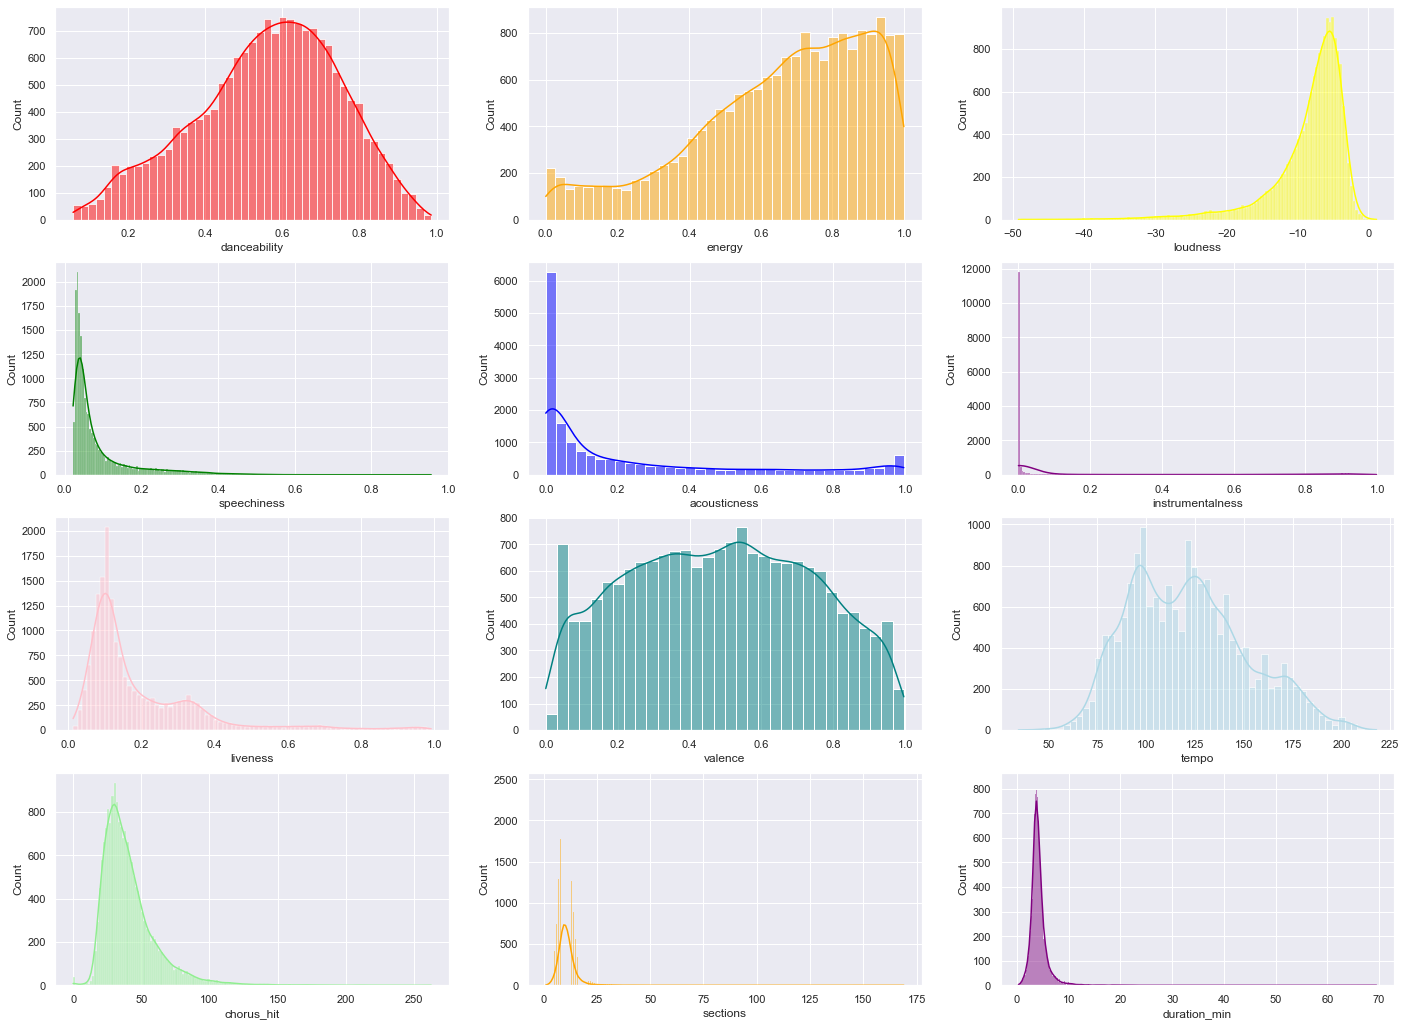

In [152]:
color = ["red", "orange", "yellow", "green", "blue", "purple", "pink", "teal", "lightblue", "lightgreen", "orange", "purple"]
f, axes = plt.subplots(4, 3, figsize=(24, 18))
i, j, count = 0, 0, 0
for var in dfNumeric:
    sb.histplot(dfNumeric[var], color = color[count], ax = axes[i,j], kde = True)
    if i == 3 and j == 3:
        break
    count += 1
    if j == 2:
        j = 0
        i += 1
    else: j += 1

<AxesSubplot:>

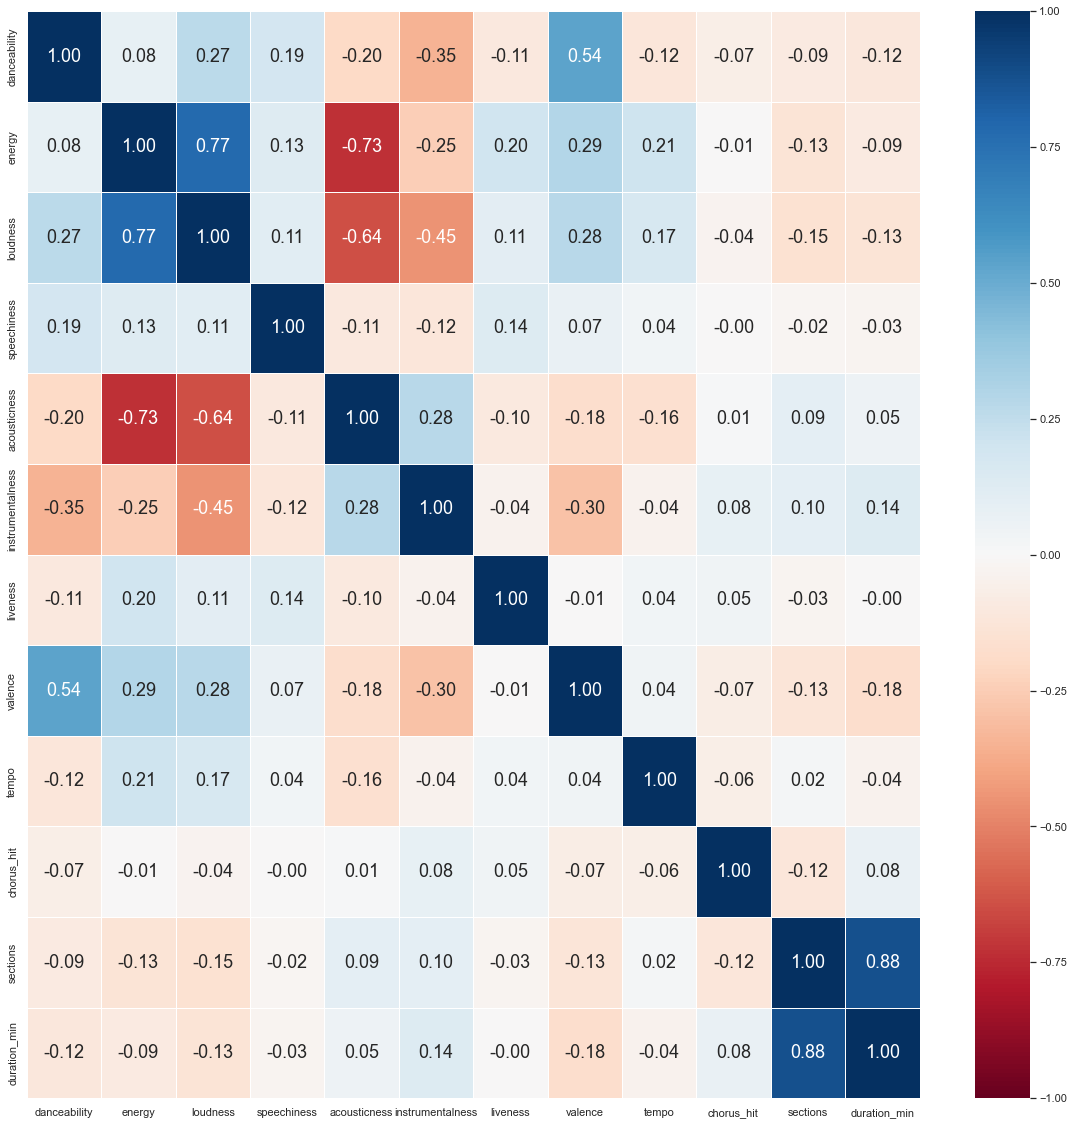

In [153]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(dfNumeric.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

**Comment** - From the correlation matrix, it can be seen that `sections` and `duration_min` has the strongest correlation, at 0.88. Followed, by `loudness` and `danceability`, at 0.77. There is also a strong negative correlation between `accousticness` and `energy`, at -0.73.

### 3.5 Comparing between decades

In [155]:
#### Dataframe for 90s
df90s.clean = df[df['decade'] == 1990]
df90s.clean.head()

,track,artist,danceability,energy,key,loudness,major,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections,hitlist,decade,duration_min
4,I Can Make It Better,Luther Vandross,0.714,0.497,C,-7.643,True,0.0344,0.285000,0.000000,0.0668,0.671,95.817,3,25.39514,15,True,1990,5.59
14,The New Democracy,The Nashville Bluegrass Band,0.513,0.429,D,-15.271,True,0.0336,0.471000,0.950000,0.2910,0.819,142.354,4,74.51253,7,False,1990,2.94
15,(I Want To Be An) Anglepoise Lamp (Live,The Soft Boys,0.409,0.929,A,-7.658,True,0.0685,0.047900,0.000000,0.1560,0.443,89.412,4,81.31047,7,False,1990,2.93
17,Lockdown,Madball,0.401,0.968,B,-6.681,True,0.1240,0.000294,0.000451,0.1210,0.278,90.226,4,51.03063,5,False,1990,1.75
19,She's A River,Simple Minds,0.370,0.854,D,-7.018,True,0.0812,0.001470,0.000006,0.0586,0.181,184.068,4,29.65163,17,True,1990,5.54


In [212]:
featureDict90s_mean = {}
features = ["danceability","energy","speechiness","acousticness","instrumentalness","liveness","valence"]

for f in features:
    featureDict90s_mean[f] = df90s.clean[f].mean()

dfFeature90s = pd.DataFrame(list(featureDict90s_mean.items()), columns = ['Feature', 'Characteristics'])

dfFeature90s['Decade'] = pd.Series(1990, index=dfFeature90s.index)
dfFeature90s

,Feature,Characteristics,Decade
0,danceability,0.567208,1990
1,energy,0.602767,1990
2,speechiness,0.074033,1990
3,acousticness,0.290393,1990
4,instrumentalness,0.159582,1990
5,liveness,0.197227,1990
6,valence,0.538153,1990


In [213]:
#### Dataframe for 00s
df00s.clean = df[df['decade'] == 2000]
df00s.clean.head()

,track,artist,danceability,energy,key,loudness,major,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections,hitlist,decade,duration_min
1,Sirena,Faun,0.537,0.631,G,-12.199,True,0.0322,0.00676,0.008490,0.1530,0.158,134.960,5,32.25945,12,False,2000,5.19
2,Same Girl,R. Kelly Duet With Usher,0.717,0.583,C#,-5.008,True,0.1460,0.50600,0.000000,0.0821,0.816,139.760,4,31.52992,10,True,2000,4.22
6,So Sick,Ne-Yo,0.452,0.574,F#,-8.336,True,0.3100,0.24600,0.000000,0.1890,0.580,92.791,4,20.40989,11,True,2000,3.45
8,Forget About the Boy,Sutton Foster,0.456,0.437,D,-9.599,False,0.2580,0.72700,0.000002,0.4600,0.766,200.316,4,28.38139,11,False,2000,3.39
12,Toes,Zac Brown Band,0.800,0.759,B,-5.398,True,0.0378,0.65500,0.000000,0.0897,0.821,129.979,4,29.42405,10,True,2000,4.38


In [214]:
featureDict00s_mean = {}
features = ["danceability","energy","speechiness","acousticness","instrumentalness","liveness","valence"]

for f in features:
    featureDict00s_mean[f] = df00s.clean[f].mean()

dfFeature00s = pd.DataFrame(list(featureDict00s_mean.items()), columns = ['Feature', 'Characteristics'])

dfFeature00s['Decade'] = pd.Series(2000, index=dfFeature00s.index)
dfFeature00s

,Feature,Characteristics,Decade
0,danceability,0.542847,2000
1,energy,0.694454,2000
2,speechiness,0.092400,2000
3,acousticness,0.214354,2000
4,instrumentalness,0.150838,2000
5,liveness,0.196162,2000
6,valence,0.482277,2000


In [215]:
#### Dataframe for 10s
df10s.clean = df[df['decade'] == 2010]
df10s.clean.head()

,track,artist,danceability,energy,key,loudness,major,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections,hitlist,decade,duration_min
0,Gypsy,Shakira,0.763,0.758,F#,-5.106,True,0.0576,0.64000,0.0000,0.0706,0.515,92.727,4,31.45224,10,True,2010,3.31
3,T-shirt van Metallica - Live @ Graspop Metal M...,Fleddy Melculy,0.264,0.745,C#,-5.651,True,0.1470,0.00122,0.0308,0.9270,0.220,173.038,4,57.25540,14,False,2010,4.88
5,Questions,Chris Brown,0.614,0.598,A#,-6.335,False,0.0561,0.00543,0.0000,0.1000,0.565,105.803,4,43.76138,6,True,2010,2.16
7,Another Round,Fat Joe Featuring Chris Brown,0.271,0.762,F#,-6.277,False,0.2750,0.07190,0.0000,0.1430,0.410,80.248,4,49.06984,12,True,2010,4.81
9,Doabey Wala,Garry Sandhu,0.804,0.795,B,-2.951,False,0.1100,0.01600,0.0000,0.2000,0.336,98.041,4,29.42124,9,False,2010,3.63


In [216]:
featureDict10s_mean = {}
features = ["danceability","energy","speechiness","acousticness","instrumentalness","liveness","valence"]

for f in features:
    featureDict10s_mean[f] = df10s.clean[f].mean()

dfFeature10s = pd.DataFrame(list(featureDict10s_mean.items()), columns = ['Feature', 'Characteristics'])

dfFeature10s['Decade'] = pd.Series(2010, index=dfFeature10s.index)
dfFeature10s

,Feature,Characteristics,Decade
0,danceability,0.569289,2010
1,energy,0.667176,2010
2,speechiness,0.098329,2010
3,acousticness,0.217757,2010
4,instrumentalness,0.161648,2010
5,liveness,0.197046,2010
6,valence,0.445692,2010


In [217]:
featureAll = pd.concat([dfFeature90s, dfFeature00s, dfFeature10s])
featureAll

,Feature,Characteristics,Decade
0,danceability,0.567208,1990
1,energy,0.602767,1990
2,speechiness,0.074033,1990
3,acousticness,0.290393,1990
4,instrumentalness,0.159582,1990
5,liveness,0.197227,1990
6,valence,0.538153,1990
0,danceability,0.542847,2000
1,energy,0.694454,2000
2,speechiness,0.092400,2000


Here, we are concatenating feature data for all 3 decades.

#### 3.5.1 Audio Characteristics with Line Chart

In [218]:
fig = px.line(featureAll, x="Decade", y="Characteristics", color='Feature')
fig.show()

#### 3.5.2 Audio Characteristics with Bar Chart

In [219]:
fig = px.histogram(featureAll, x='Feature', y="Characteristics", color="Decade", barmode='group')
fig.show()

## 4. Machine Learning

We are using the `cleaned data`, from the previous data cleaning process, for all models of machine learning

### 4.1 Random Forest Classification

In [296]:
numericalFeats =  ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                   'instrumentalness', 'liveness','valence', 'tempo', 'chorus_hit','sections','duration_min']

#### Dataset for 1990

First, we will be doing random forest classification on `1990s songs`

In [279]:
# Train and test split for 1990s
x1 = df90s[numericalFeats]
y1 = df90s['hitlist']
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25,random_state=0) 

In [280]:
# Making Random Forest Model
RF = RandomForestClassifier()
RF.fit(x1_train, y1_train)

RFprob = RF.predict_proba(x1_test)[::,1]
RFpred = RF.predict(x1_test)

**Feature Importance**

In [291]:
importances90s = pd.DataFrame({'feature':x1_train.columns,'importance 90s':np.round(RF.feature_importances_,3)})
importances90s = importances90s.sort_values('importance 90s',ascending=False).set_index('feature')
importances90s

,importance 90s
feature,
instrumentalness,0.279
loudness,0.103
energy,0.097
danceability,0.096
acousticness,0.093
duration_min,0.066
valence,0.064
speechiness,0.047
liveness,0.043


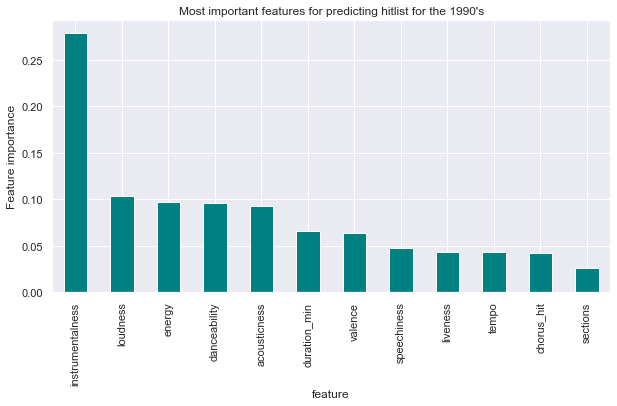

In [292]:
importances90s.plot(kind='bar', color = "teal", title = "Most important features for predicting hitlist for the 1990's", legend = None)
plt.ylabel('Feature importance')
plt.show()

**Predicting Hitlist Model**

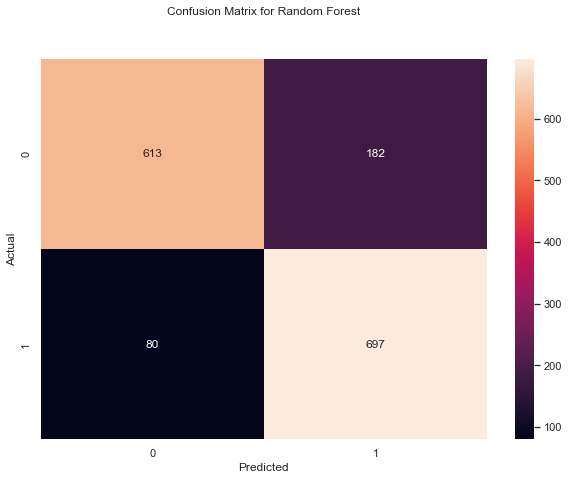

In [293]:
y1_pred = RF.predict(x1_test)
cnf_matrix = metrics.confusion_matrix(y1_test, y1_pred)

plt.figure(figsize=(10,7))
sb.heatmap(cnf_matrix, annot=True, fmt = 'g')
plt.title('Confusion Matrix for Random Forest', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [294]:
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("Precision:",metrics.precision_score(y1_test, y1_pred))
print("Recall:",metrics.recall_score(y1_test, y1_pred))

Accuracy: 0.8333333333333334
Precision: 0.7929465301478953
Recall: 0.8970398970398971


#### Dataset for 2000

Second, we will be doing random forest classification on `200s songs`

In [298]:
# Train and test split for 2000s
x2 = df00s[numericalFeats]
y2 = df00s['hitlist']
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.25,random_state=0) 

In [299]:
# Making Random Forest Model
RF = RandomForestClassifier()
RF.fit(x2_train, y2_train)

RFprob = RF.predict_proba(x2_test)[::,1]
RFpred = RF.predict(x2_test)

**Feature Importance**

In [300]:
importances00s = pd.DataFrame({'feature':x2_train.columns,'importance 00s':np.round(RF.feature_importances_,3)})
importances00s = importances00s.sort_values('importance 00s',ascending=False).set_index('feature')
importances00s

,importance 00s
feature,
instrumentalness,0.239
danceability,0.134
loudness,0.106
acousticness,0.095
duration_min,0.094
energy,0.074
valence,0.058
speechiness,0.053
tempo,0.041


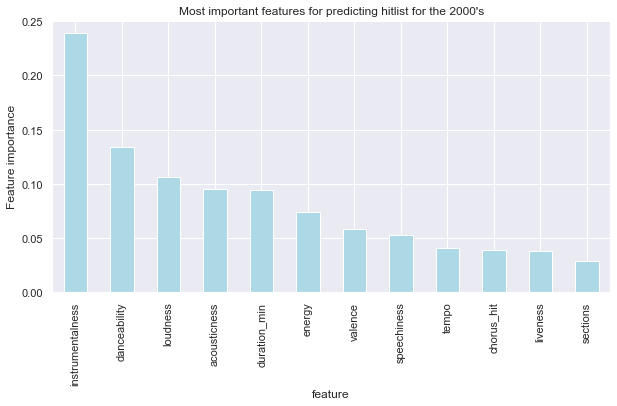

In [302]:
importances00s.plot(kind='bar', color = "lightblue", title = "Most important features for predicting hitlist for the 2000's", legend = None)
plt.ylabel('Feature importance')
plt.show()

**Predicting Hitlist Model**

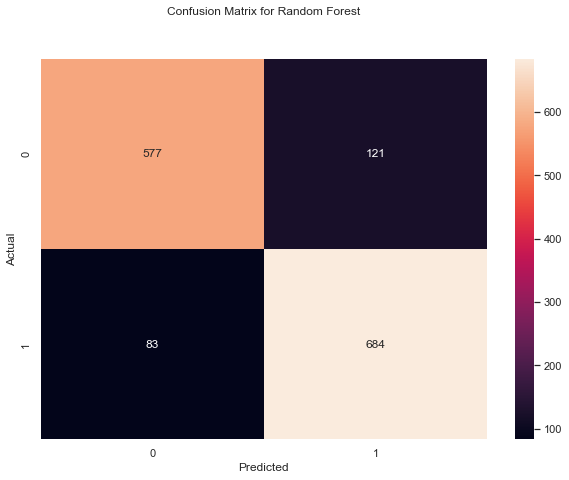

In [303]:
y2_pred = RF.predict(x2_test)
cnf_matrix = metrics.confusion_matrix(y2_test, y2_pred)

plt.figure(figsize=(10,7))
sb.heatmap(cnf_matrix, annot=True, fmt = 'g')
plt.title('Confusion Matrix for Random Forest', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [304]:
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))
print("Precision:",metrics.precision_score(y2_test, y2_pred))
print("Recall:",metrics.recall_score(y2_test, y2_pred))

Accuracy: 0.8607508532423208
Precision: 0.8496894409937888
Recall: 0.8917861799217731


#### Dataset for 2010

Third, we will be doing random forest classification on `2010s songs`

In [295]:
# Train and test split for 2010s
x3 = df10s[numericalFeats]
y3 = df10s['hitlist']
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,test_size=0.25,random_state=0) 

In [286]:
# Making Random Forest Model
RF = RandomForestClassifier()
RF.fit(x3_train, y3_train)

RFprob = RF.predict_proba(x3_test)[::,1]
RFpred = RF.predict(x3_test)

**Feature Importance**

In [287]:
importances10s = pd.DataFrame({'feature':x3_train.columns,'importance 10s':np.round(RF.feature_importances_,3)})
importances10s = importances10s.sort_values('importance 10s',ascending=False).set_index('feature')
importances10s

,importance 10s
feature,
instrumentalness,0.279
loudness,0.103
energy,0.097
danceability,0.096
acousticness,0.093
duration_min,0.066
valence,0.064
speechiness,0.047
liveness,0.043


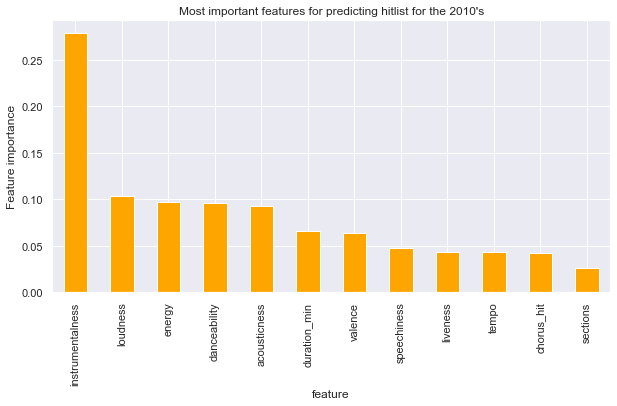

In [288]:
importances10s.plot(kind='bar', color = "orange", title = "Most important features for predicting hitlist for the 2010's", legend = None)
plt.ylabel('Feature importance')
plt.show()

**Predicting Hitlist Model**

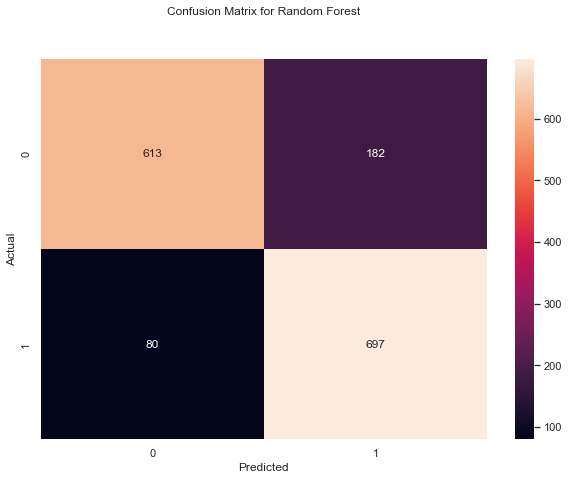

In [289]:
y3_pred = RF.predict(x3_test)
cnf_matrix = metrics.confusion_matrix(y3_test, y3_pred)

plt.figure(figsize=(10,7))
sb.heatmap(cnf_matrix, annot=True, fmt = 'g')
plt.title('Confusion Matrix for Random Forest', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [290]:
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("Precision:",metrics.precision_score(y1_test, y1_pred))
print("Recall:",metrics.recall_score(y1_test, y1_pred))

Accuracy: 0.8333333333333334
Precision: 0.7929465301478953
Recall: 0.8970398970398971


#### Dataset for All Decades

Last, we will be doing random forest classification for all decades

In [352]:
# Train and test split
x = df[numericalFeats]
y = df['hitlist']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0) 

In [353]:
# Making Random Forest Model
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RFprob = RF.predict_proba(x_test)[::,1]
RFpred = RF.predict(x_test)

**Feature Importance**

In [354]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(RF.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
instrumentalness,0.227
danceability,0.131
acousticness,0.105
energy,0.085
loudness,0.084
duration_min,0.083
valence,0.068
speechiness,0.055
tempo,0.046


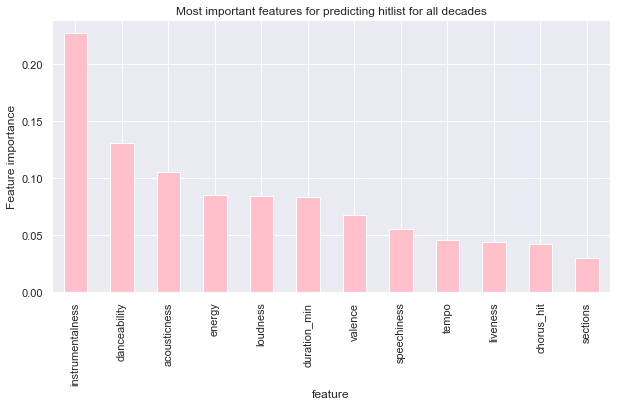

In [355]:
importances.plot(kind='bar', color = "pink", title = "Most important features for predicting hitlist for all decades", legend = None)
plt.ylabel('Feature importance')
plt.show()

**Predicting Hitlist Model**

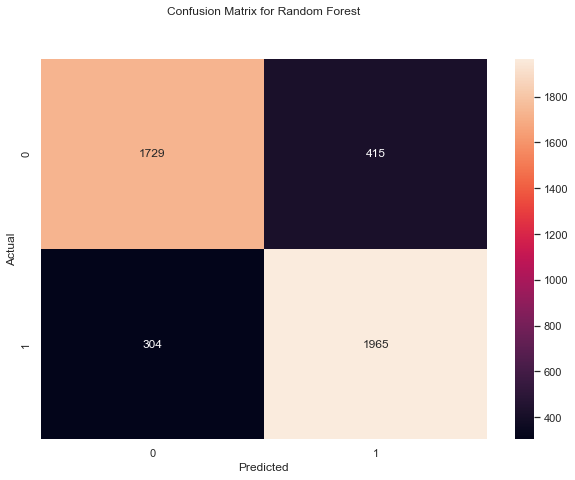

In [356]:
y_pred = RF.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sb.heatmap(cnf_matrix, annot=True, fmt = 'g')
plt.title('Confusion Matrix for Random Forest', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [357]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8370722864264672
Precision: 0.8256302521008403
Recall: 0.8660202732481269


#### Visualizing Important Features

In [358]:
compare_feats_df = pd.concat([importances, importances90s, importances00s, importances10s ], axis = 1)
compare_feats_df.rename(columns={'importance': 'Feature importance all decades'}, inplace=True)
compare_feats_df.rename(columns={'importance 90s': 'Feature importance 90s'}, inplace=True)
compare_feats_df.rename(columns={'importance 00s': 'Feature importance 00s'}, inplace=True)
compare_feats_df.rename(columns={'importance 10s': 'Feature importance 10s'}, inplace=True)
compare_feats_df

,Feature importance all decades,Feature importance 90s,Feature importance 00s,Feature importance 10s
feature,,,,
instrumentalness,0.227,0.279,0.239,0.279
danceability,0.131,0.096,0.134,0.096
acousticness,0.105,0.093,0.095,0.093
energy,0.085,0.097,0.074,0.097
loudness,0.084,0.103,0.106,0.103
duration_min,0.083,0.066,0.094,0.066
valence,0.068,0.064,0.058,0.064
speechiness,0.055,0.047,0.053,0.047
tempo,0.046,0.043,0.041,0.043


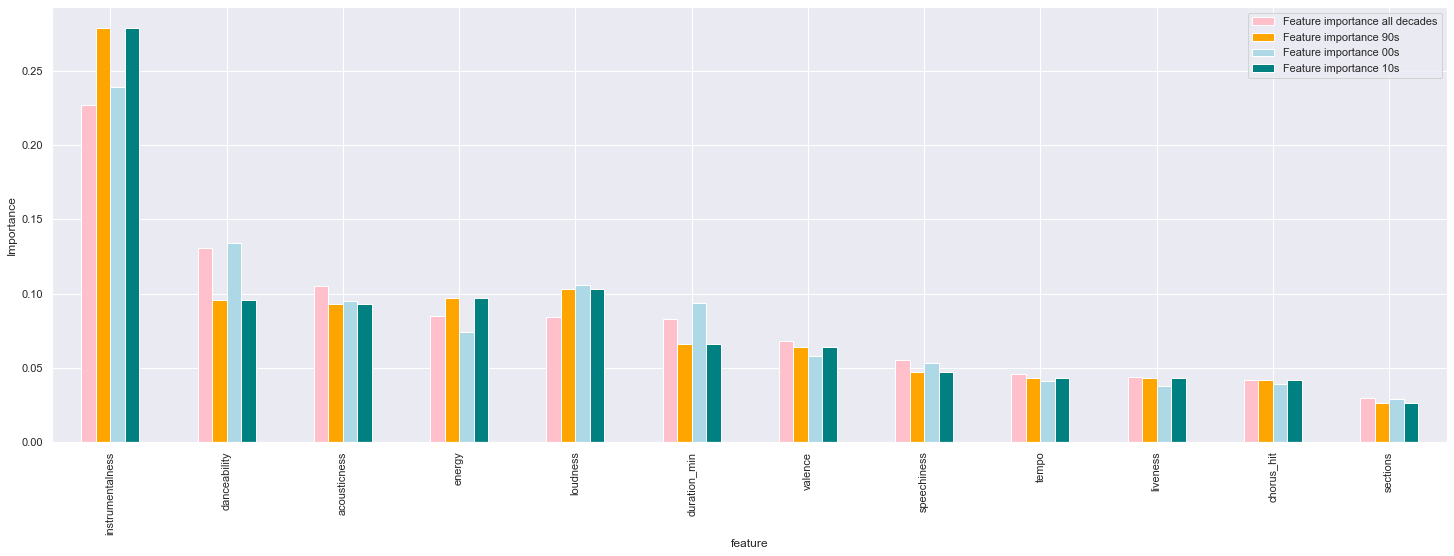

In [359]:
compare_feats_df.plot(kind='bar', color = ('pink','orange','lightblue','teal' ), figsize = (25,8))
plt.ylabel("Importance")
plt.show()

### 4.2 Logistic Regression

In [361]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
log_pred= logreg.predict(x_test)

Text(0.5, 39.5, 'Predicted')

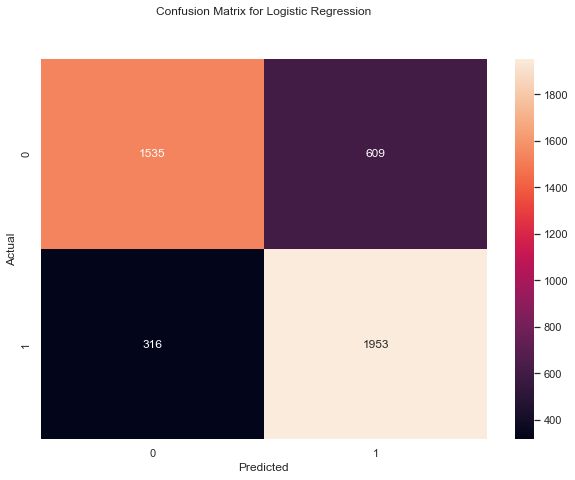

In [362]:
cm = confusion_matrix(y_test, log_pred)
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt = 'g')
plt.title('Confusion Matrix for Logistic Regression', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [363]:
print("Accuracy: ",metrics.accuracy_score(y_test, log_pred))
print("Balanced Accuracy Score: ",metrics.balanced_accuracy_score(y_test,log_pred))
print("Precision: ",metrics.precision_score(y_test, log_pred))
print("Recall: ",metrics.recall_score(y_test, log_pred))

Accuracy:  0.7903920235667347
Balanced Accuracy Score:  0.7883415461805121
Precision:  0.7622950819672131
Recall:  0.8607315998237108


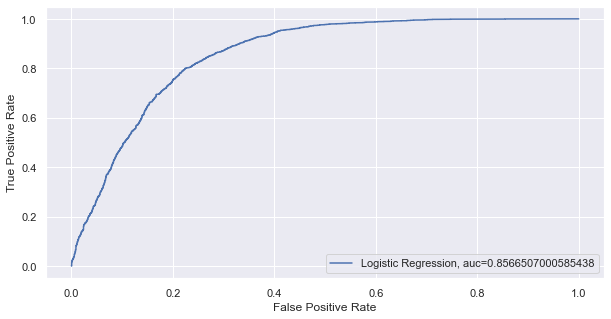

In [365]:
log_prob = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  log_prob)
lgauc = metrics.roc_auc_score(y_test, log_prob)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(lgauc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

### 4.3 Naive Bayes

In [366]:
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_prob = nb.predict_proba(x_test)[::,1]
nb_pred = nb.predict(x_test)

In [367]:
print("Accuracy: ",metrics.accuracy_score(y_test, nb_pred))
print("Balanced Accuracy Score: ",metrics.balanced_accuracy_score(y_test,nb_pred))
print("Precision: ",metrics.precision_score(y_test, nb_pred))
print("Recall: ",metrics.recall_score(y_test, nb_pred))

Accuracy:  0.7650124631769771
Balanced Accuracy Score:  0.7605134173776337
Precision:  0.7095238095238096
Recall:  0.9193477302776554


Text(0.5, 39.5, 'Predicted')

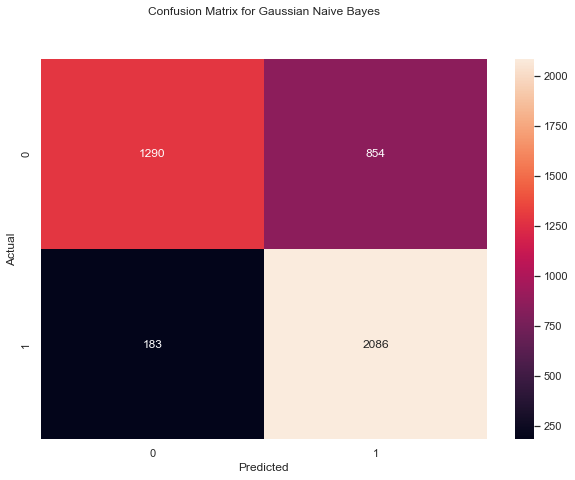

In [368]:
cm_nb = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(10,7))
sb.heatmap(cm_nb, annot=True, fmt = 'g')
plt.title('Confusion Matrix for Gaussian Naive Bayes', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

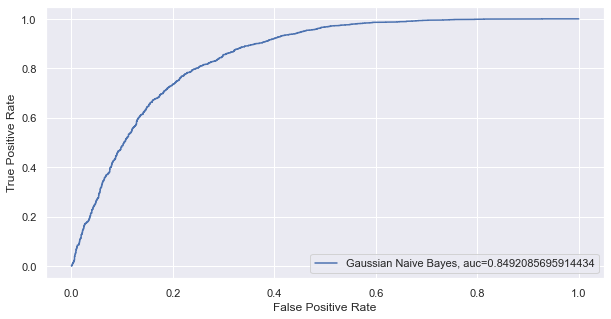

In [369]:
nbfpr, nbtpr, _ = metrics.roc_curve(y_test, nb_prob)
nbauc = metrics.roc_auc_score(y_test, nb_prob)
plt.plot(nbfpr,nbtpr,label="Gaussian Naive Bayes, auc="+str(nbauc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

In [205]:
print('Random Forest: AUROC = %.4f' % (rfauc))
print('Naive Bayes: AUROC = %.4f' % (nbauc))
print('Logistic Regression: AUROC = %.4f' % (lgauc))

Random Forest: AUROC = 0.8507
Naive Bayes: AUROC = 0.8464
Logistic Regression: AUROC = 0.8426


In [206]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [207]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, RFprob)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_prob)
lg_fpr, lg_tpr, _ = roc_curve(y_test, log_prob)

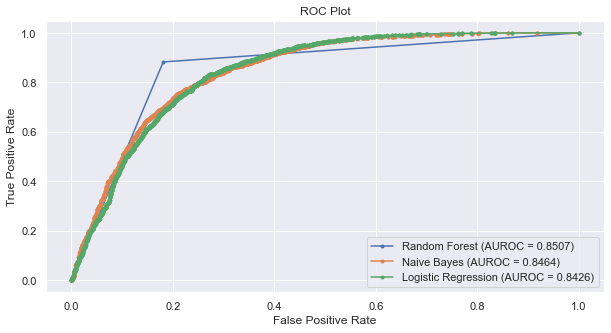

In [208]:
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.4f)' % rfauc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.4f)' % nbauc)
plt.plot(lg_fpr, lg_tpr, marker='.', label='Logistic Regression (AUROC = %0.4f)' % lgauc)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()  
plt.show()